In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("final_dataset.csv")

In [3]:
df

,sentence,embedding,filler_count,filler_similarity_score,word_count,char_count,avg_word_length,stopword_ratio,starts_with_filler,interjection_count,adverb_count,label
0,"It's I love it or hate it, right?","[-0.012661975808441639, 0.06156179681420326, 0...",1,0.140165,8,33,4.125000,0.500000,0,0,0,0
1,Like I see a lot of competitors of vendors usi...,"[-0.05112722888588905, -0.018745936453342438, ...",1,0.149294,11,52,4.727273,0.363636,1,1,0,0
2,We’re actively engaging with stakeholders to e...,"[0.05764487013220787, -0.03406272083520889, -0...",0,0.117415,12,92,7.666667,0.333333,0,0,2,1
3,"Well, we could do that, but I think we should ...","[-0.0024398460518568754, -0.026481585577130318...",2,0.121604,18,98,5.444444,0.555556,1,1,0,1
4,Let’s revisit that once we have more clarity.,"[0.03573001176118851, -0.022633126005530357, 0...",0,0.124023,8,45,5.625000,0.625000,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1488,"Hmm, that could work, but I think it’s importa...","[-0.0510079599916935, -0.034828800708055496, -...",1,0.082236,15,85,5.666667,0.400000,0,0,0,1
1489,"Actually, we need to gather more input from th...","[0.03619445487856865, -0.02361270785331726, -0...",1,0.075178,15,82,5.466667,0.533333,1,0,1,1
1490,What I meant by that is.,"[0.1063312217593193, -0.023991813883185387, 0....",1,0.302284,6,24,4.000000,0.666667,0,0,0,1
1491,I was feeling the red and yellow too.,"[-0.020541170611977577, -0.026103762909770012,...",0,0.028836,8,37,4.625000,0.500000,0,0,1,0


In [4]:
# Check if the first row of `embedding` is a list
type(df['embedding'].iloc[0])


str

In [5]:
import ast

# Convert the stringified list into actual lists using ast.literal_eval
df['embedding'] = df['embedding'].apply(ast.literal_eval)


In [6]:
# Check if the first row of `embedding` is a list
type(df['embedding'].iloc[0])


list

In [7]:
import pandas as pd

# Convert list of embeddings to a DataFrame (each value in the list becomes a column)
embeddings_df = pd.DataFrame(df['embedding'].to_list()).add_prefix('emb_')

# Drop the original embedding column and join the new flattened one
df = df.drop(columns=['embedding'])
df = pd.concat([df, embeddings_df], axis=1)


In [8]:
df

,sentence,filler_count,filler_similarity_score,word_count,char_count,avg_word_length,stopword_ratio,starts_with_filler,interjection_count,adverb_count,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,"It's I love it or hate it, right?",1,0.140165,8,33,4.125000,0.500000,0,0,0,...,0.109780,-0.001753,-0.061262,0.064415,0.003584,0.017659,0.075725,0.028658,0.092558,0.026132
1,Like I see a lot of competitors of vendors usi...,1,0.149294,11,52,4.727273,0.363636,1,1,0,...,0.016374,0.015404,0.037874,-0.075169,0.071889,-0.026995,0.038889,-0.077489,0.150485,0.104644
2,We’re actively engaging with stakeholders to e...,0,0.117415,12,92,7.666667,0.333333,0,0,2,...,0.003008,0.030999,-0.004578,0.008667,0.030300,0.006455,0.091455,0.049775,0.030295,0.021047
3,"Well, we could do that, but I think we should ...",2,0.121604,18,98,5.444444,0.555556,1,1,0,...,0.107029,0.013867,0.028854,-0.032436,-0.082884,0.017125,0.053780,-0.102191,-0.035390,-0.001251
4,Let’s revisit that once we have more clarity.,0,0.124023,8,45,5.625000,0.625000,0,0,0,...,0.156662,0.040978,-0.054334,0.022438,-0.133408,0.042380,0.100504,0.056003,0.105797,-0.017472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,"Hmm, that could work, but I think it’s importa...",1,0.082236,15,85,5.666667,0.400000,0,0,0,...,0.048718,0.047317,0.018483,0.051441,0.000938,-0.023713,0.064497,-0.012850,-0.069628,0.077810
1489,"Actually, we need to gather more input from th...",1,0.075178,15,82,5.466667,0.533333,1,0,1,...,0.128069,0.024606,-0.061451,-0.002484,0.005974,-0.048833,0.030377,0.032780,0.006478,-0.029855
1490,What I meant by that is.,1,0.302284,6,24,4.000000,0.666667,0,0,0,...,0.082770,-0.016004,-0.020795,0.015710,-0.017561,-0.039651,0.055934,-0.045097,0.037197,-0.016554
1491,I was feeling the red and yellow too.,0,0.028836,8,37,4.625000,0.500000,0,0,1,...,0.021413,-0.129850,-0.076109,0.035077,-0.018817,0.066136,0.056723,-0.046399,-0.086291,0.053809


In [9]:
# Drop non-feature columns like sentence or label if needed
X = df.drop(columns=['sentence', 'label'])  # Keep only numeric features
y = df['label']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9464882943143813
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       118
           1       0.95      0.96      0.96       181

    accuracy                           0.95       299
   macro avg       0.95      0.94      0.94       299
weighted avg       0.95      0.95      0.95       299



In [13]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict
y_pred = xgb_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:47:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9398
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       118
           1       0.94      0.96      0.95       181

    accuracy                           0.94       299
   macro avg       0.94      0.93      0.94       299
weighted avg       0.94      0.94      0.94       299



In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Define your parameter grid
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RF
rf = RandomForestClassifier(random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,  # number of random combinations to try
    cv=5,       # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # use all cores
    random_state=42
)

# Fit on your training data
random_search.fit(X_train, y_train)

# Best params and score
print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Use the best estimator to predict
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_est

/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
  File "/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-package

Best Params: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best CV Score: 0.9271474280088604
Test Accuracy: 0.939799331103679
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       118
           1       0.95      0.96      0.95       181

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



Best RF para

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from your tuning
best_params = {
    'n_estimators': 500,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'log2',
    'max_depth': 30,
    'random_state': 42  # for reproducibility
}

# Initialize the model with best params
rf_best = RandomForestClassifier(**best_params)

# Train the model
rf_best.fit(X_train, y_train)

# Evaluate on test set
y_pred_rf = rf_best.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print(f"Test Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Test Accuracy: 0.9398
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       118
           1       0.95      0.96      0.95       181

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



Best XGB para

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model with your specified parameters
xgb_model = XGBClassifier(
    n_estimators=500,
    max_depth=10,
    learning_rate=0.2,
    subsample=0.8,
    colsample_bytree=0.7,
    min_child_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


/home/sachin/Desktop/AI-Report-Gen/my_py311_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:47:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.9498
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       118
           1       0.96      0.96      0.96       181

    accuracy                           0.95       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.95      0.95      0.95       299



In [18]:
import matplotlib.pyplot as plt

report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
df_rf = pd.DataFrame(report_rf).transpose()
df_xgb = pd.DataFrame(report_xgb).transpose()


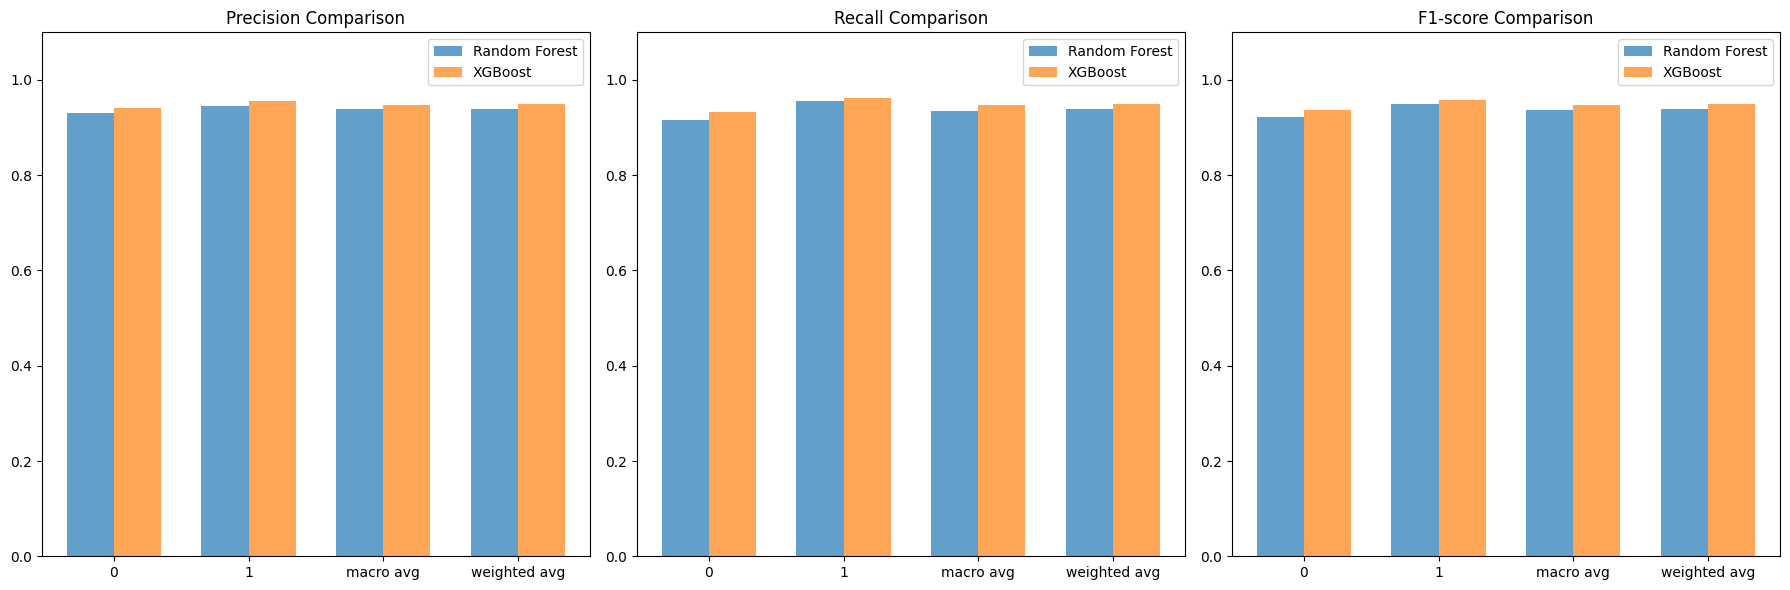

In [19]:
metrics = ['precision', 'recall', 'f1-score']
classes = ['0', '1', 'macro avg', 'weighted avg']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    rf_vals = df_rf.loc[classes, metric].values
    xgb_vals = df_xgb.loc[classes, metric].values
    
    x = np.arange(len(classes))
    width = 0.35
    
    axes[i].bar(x - width/2, rf_vals, width, label='Random Forest', alpha=0.7)
    axes[i].bar(x + width/2, xgb_vals, width, label='XGBoost', alpha=0.7)
    
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(classes)
    axes[i].set_ylim(0, 1.1)
    axes[i].set_title(f'{metric.capitalize()} Comparison')
    axes[i].legend()

plt.tight_layout()
plt.show()
